In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [4]:
# Load dataset
df = pd.read_csv("dataset.csv", parse_dates=[1, 2])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

In [5]:
# Feature engineering
df['time_taken'] = df['actual_delivery_time'] - df['created_at']
df['time_taken_mins'] = pd.to_timedelta(df['time_taken']) / pd.Timedelta('1m')
df['hours'] = df['created_at'].dt.hour
df['day'] = df['created_at'].dt.dayofweek
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   market_id                 196441 non-null  float64        
 1   created_at                197428 non-null  datetime64[ns] 
 2   actual_delivery_time      197421 non-null  datetime64[ns] 
 3   store_id                  197428 non-null  object         
 4   store_primary_category    192668 non-null  object         
 5   order_protocol            196433 non-null  float64        
 6   total_items               197428 non-null  int64          
 7   subtotal                  197428 non-null  int64          
 8   num_distinct_items        197428 non-null  int64          
 9   min_item_price            197428 non-null  int64          
 10  max_item_price            197428 non-null  int64          
 11  total_onshift_partners    181166 non-null  float64  

In [5]:
# Drop unnecessary features
df.drop(['time_taken', 'created_at', 'actual_delivery_time', 'store_id'], axis=1, inplace=True)
df.dropna(inplace=True)


In [6]:
# Encode categorical variable
label_encoder = LabelEncoder()
df['store_primary_category_encoded'] = label_encoder.fit_transform(df['store_primary_category'])
df.drop(['store_primary_category'], axis=1, inplace=True)

# Data visualization
sns.heatmap(df.corr())
plt.show()


ValueError: could not convert string to float: 'df263d996281d984952c07998dc54358'

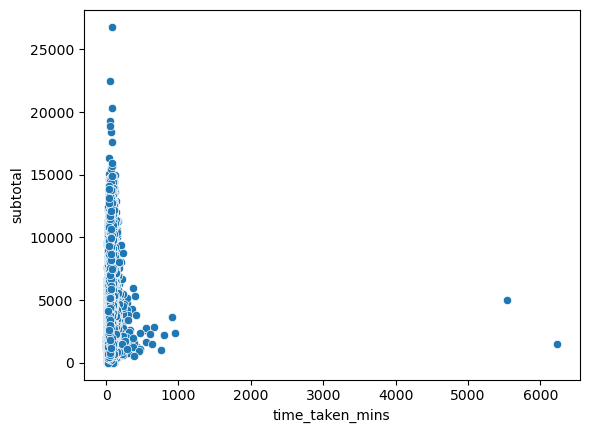

In [17]:
sns.scatterplot(x='time_taken_mins', y='subtotal', data=df)
plt.show()



/var/folders/zs/z2mzjfxd0z329dw6hct9b0x40000gn/T/ipykernel_3672/3665034015.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['day'], palette='Set2')


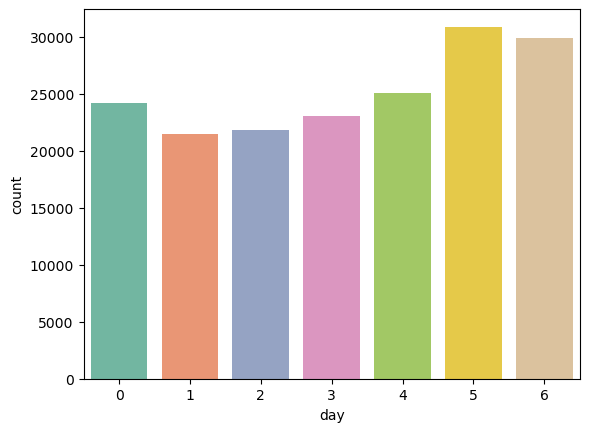

In [18]:
sns.countplot(x=df['day'], palette='Set2')
plt.show()


/var/folders/zs/z2mzjfxd0z329dw6hct9b0x40000gn/T/ipykernel_3672/3212482124.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hours'], palette='Set2')


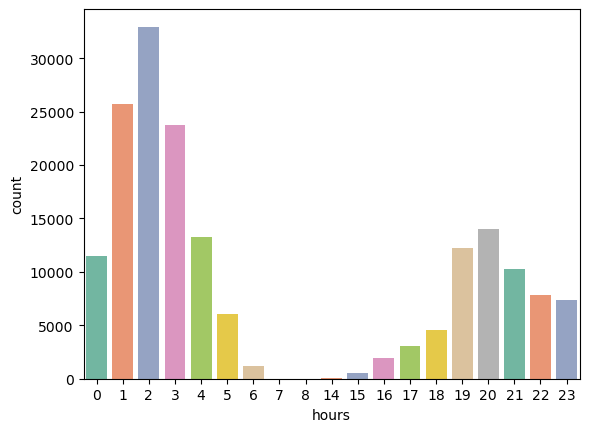

In [19]:
sns.countplot(x=df['hours'], palette='Set2')
plt.show()


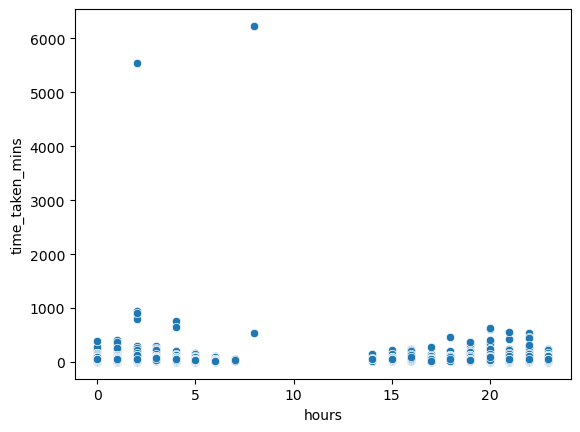

In [20]:

sns.scatterplot(x='hours', y='time_taken_mins', data=df)
plt.show()


In [21]:
# Data modeling
y = df['time_taken_mins']
x = df.drop(['time_taken_mins'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   market_id                       176248 non-null  float64
 1   order_protocol                  176248 non-null  float64
 2   total_items                     176248 non-null  int64  
 3   subtotal                        176248 non-null  int64  
 4   num_distinct_items              176248 non-null  int64  
 5   min_item_price                  176248 non-null  int64  
 6   max_item_price                  176248 non-null  int64  
 7   total_onshift_partners          176248 non-null  float64
 8   total_busy_partners             176248 non-null  float64
 9   total_outstanding_orders        176248 non-null  float64
 10  time_taken_mins                 176248 non-null  float64
 11  hours                           176248 non-null  int32  
 12  day                  

In [23]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Random Forest
regressor = RandomForestRegressor()
regressor = RandomForestRegressor(n_estimators=100, n_jobs=-1)
regressor.fit(x_train, y_train)

prediction = regressor.predict(x_test)

mse = mean_squared_error(y_test, prediction)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, prediction)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

r2 = r2_score(y_test, prediction)

def MAPE(y_actual, y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100
    return mape

mape = MAPE(y_test, prediction)




MSE: 307.296787836471
RMSE: 17.529882710288483
MAE: 11.648529743119816


In [24]:
r2 = r2_score(y_test, prediction)
print(f'r2 : {r2}' )

r2 : 0.17358356560776256


In [25]:
def MAPE(y_actual, y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100
    return mape

print = ('mape : ', MAPE(y_test, prediction))

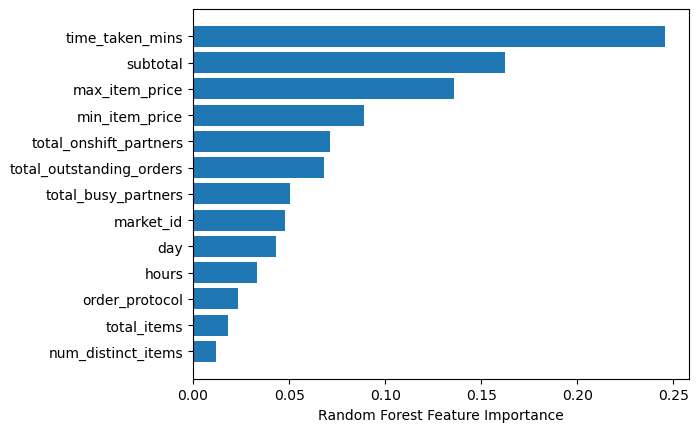

In [26]:
# Feature importance visualization
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()


In [1]:
# Neural Network
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
# Before model.fit:
print(x_train.isnull().any())
print(y_train.isnull().any())
# Or check for infinite values:
# print(np.isfinite(x_train).all())

# Smaller batch size to reduce per-step memory usage
history = model.fit(x_train, y_train, epochs=30, batch_size=128, verbose=1, validation_split=0.2)
# Try this simpler, less demanding architecture
model = Sequential()
model.add(Dense(14, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, activation='relu')) # Reduced from 512
model.add(Dense(256, activation='relu')) # Reduced from 1024
model.add(Dense(64, activation='relu'))  # Reduced from 256
model.add(Dense(1, activation='relu'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae'])

history = model.fit(x_train, y_train, epochs=30, batch_size=512, verbose=1, validation_split=0.2)

: 

In [1]:
# Neural Network with significantly smaller layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# ... (Scaling and data split code remains the same) ...

model = Sequential()
# Input Layer: 14 units (maintaining the input dimension reference)
model.add(Dense(14, kernel_initializer='normal', activation='relu')) 
# Hidden Layer 1: Reduced from 512 to 64 units
model.add(Dense(64, activation='relu')) 
# Hidden Layer 2: Reduced from 1024 to 32 units
model.add(Dense(32, activation='relu')) 
# Hidden Layer 3: Reduced from 256 to 16 units
model.add(Dense(16, activation='relu')) 
# Output Layer: 1 unit for regression
model.add(Dense(1, activation='relu')) 

# Compile and train (keeping the batch size reduced to 128 for safety)
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae'])

history = model.fit(x_train, y_train, epochs=30, batch_size=128, verbose=1, validation_split=0.2)

: 

In [30]:
!pip install tensorflow 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
